In [1]:
# Author: Abdulmenaf Altintas

from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
# show figures in line
%matplotlib inline

In [3]:
quantum_circuit = QuantumCircuit(3,3)  # use 3 quantum and classical registers

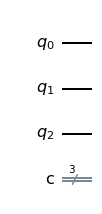

In [4]:
quantum_circuit.draw(output="mpl") # visuulize initial circuit

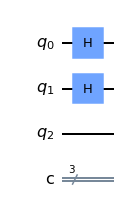

In [5]:
quantum_circuit.h(0)
quantum_circuit.h(1)
quantum_circuit.draw(output="mpl")

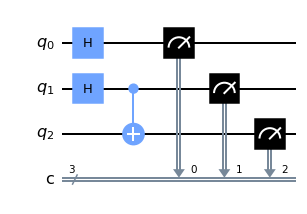

In [6]:
quantum_circuit.cx(1,2)  # 1 for control qubit and 2 is for target qubit
quantum_circuit.measure([0, 1, 2], [0, 1, 2])  # add measurement
quantum_circuit.draw(output="mpl")

In [7]:
quantum_simulator = Aer.get_backend("qasm_simulator")

In [8]:
get_result = execute(quantum_circuit, backend=quantum_simulator).result()

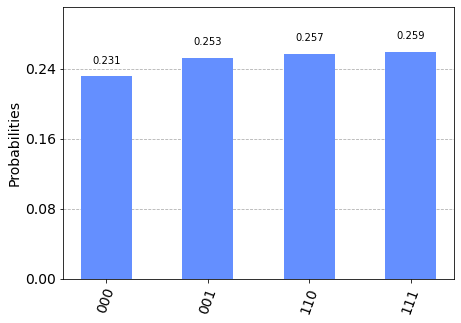

In [9]:
plot_histogram(get_result.get_counts(quantum_circuit))

In [10]:
# run on real quantum computer

IBMQ.save_account(open("../IBM/useIBMlocally.txt").read())

configrc.store_credentials:WARNING:2022-01-22 16:56:57,158: Credentials already present. Set overwrite=True to overwrite.


In [11]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [12]:
qc_providers = IBMQ.get_provider("ibm-q")

In [13]:
qc_providers.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [14]:
for qc_computer in qc_providers.backends():
    try:
        n_qubits = len(qc_computer.properties().qubits)
        print(f"{qc_computer.name()} => {qc_computer.status().pending_jobs} job(s) are pending and {qc_computer.name()} has {n_qubits} qubits.")
    except:
        n_qubits = "quantum_simulator"
        print(f"{qc_computer.name()} is a simulator")
            

ibmq_qasm_simulator is a simulator
ibmq_armonk => 15 job(s) are pending and ibmq_armonk has 1 qubits.
ibmq_santiago => 2097 job(s) are pending and ibmq_santiago has 5 qubits.
ibmq_bogota => 15 job(s) are pending and ibmq_bogota has 5 qubits.
ibmq_lima => 17 job(s) are pending and ibmq_lima has 5 qubits.
ibmq_belem => 47 job(s) are pending and ibmq_belem has 5 qubits.
ibmq_quito => 309 job(s) are pending and ibmq_quito has 5 qubits.
simulator_statevector is a simulator
simulator_mps is a simulator
simulator_extended_stabilizer is a simulator
simulator_stabilizer is a simulator
ibmq_manila => 347 job(s) are pending and ibmq_manila has 5 qubits.


In [15]:
qc_get_computer = qc_providers.get_backend("ibmq_belem")

In [16]:
# watch job status

import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor

%qiskit_job_watcher

job_executed = execute(quantum_circuit, backend=qc_get_computer)

job_monitor(job_executed)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

Job Status: job has successfully run


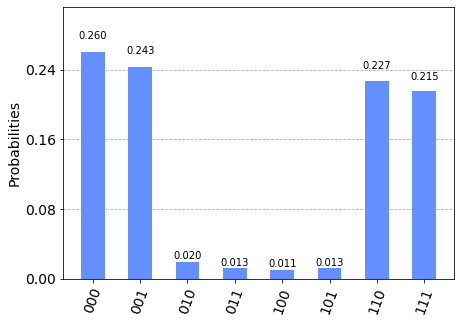

In [17]:
# get results of computation

qc_compute_result = job_executed.result()

plot_histogram(qc_compute_result.get_counts(quantum_circuit))